In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-or-not-spam-dataset/spam_or_not_spam.csv
/kaggle/input/sms-spam-collection-dataset/spam.csv


 #  <center> A Complete Guide to Naive Bayes Classifiers </center>

### <center> Support me with an upvote if you find it useful! 👍 </center>

# A little introduction
*These Informations are Gathered from Different Sources:-
Spam Email , become a big trouble over the internet. Spam is waste of time, storage space and communication bandwidth. The problem of spam e-mail has been increasing for years. In recent statistics, 40% of all emails are spam which about 15.4 billion email per day and that cost internet users about $355 million per year Knowledge engineering and machine learning are the two general approaches used in e-mail filtering In knowledge engineering approach a set of rules has to be specified according to which emails are categorized as spam or ham.
Machine learning approach is more efficient than knowledge engineering approach; it does not require specifying any rules . Instead, a set of training samples, these samples is a set of pre classified e-mail messages. A specific algorithm is then used to learn the classification rules from these e-mail messages. Machine learning approach has been widely studied and there are lots of algorithms can be used in e-mail filtering. They include Naive Bayes, support vector machines, Neural Networks, K-nearest neighbour, Rough sets and the artificial immune system.
**



![](https://lh4.googleusercontent.com/GLh_DMfJTADGQatgbiE_LBXnMEgeRdbRxRK76oeD2lNCNOuFvI4Sakq9UWKjPPYFF6C0peSHddcbSvp4_N0GORgVVsLR9sHg1heYIrtTEOOvUIatb6AGKoPd0vdTnf_EOviu49tJ)

![](
https://lh5.googleusercontent.com/z4dZJZ-tTiTXFWdLyq8c4S0MuGZMkRwnw24eiSa0Bsnw08a6LioH4lRy_7OorCcjW_NeJug-rolsFGrt-rB13gBrMDsSp7PboQ-7Aj824YR7gkI6JwM6djpgLo2uYMQ6cD3kBX2z
)

# What is Naive Bayes algorithm?
It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.
For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’.


![](https://lh4.googleusercontent.com/GLh_DMfJTADGQatgbiE_LBXnMEgeRdbRxRK76oeD2lNCNOuFvI4Sakq9UWKjPPYFF6C0peSHddcbSvp4_N0GORgVVsLR9sHg1heYIrtTEOOvUIatb6AGKoPd0vdTnf_EOviu49tJ)

# How it is work

Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.
Bayes theorem provides a way of calculating posterior probability P(c|x) from P(c), P(x) and P(x|c). Look at the equation below:
 Above,
* P(c|x) is the posterior probability of class (c, target) given predictor (x, attributes).
* P(c) is the prior probability of class.
* P(x|c) is the likelihood which is the probability of predictor given class.
* P(x) is the prior probability of predictor.



![](https://miro.medium.com/max/640/1*2Ixe8hsTASXjMXt9TySHGA.png)

# Importing Libaries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  

# Importing Data

In [3]:
data = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin-1')
data.head(n=10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


# EDA

In [4]:
df = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df = df.rename(columns={"v1":"label", "v2":"sms"})

In [5]:
df

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
#Number of observations in each label spam and ham
df.label.value_counts()


ham     4825
spam     747
Name: label, dtype: int64

In [7]:
df.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
df['length'] = df['sms'].apply(len)
df.head(5)

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:ylabel='Frequency'>

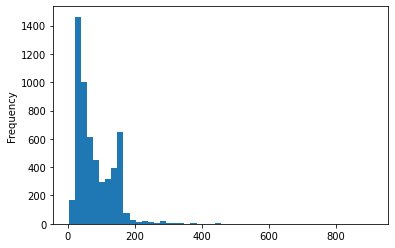

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
df['length'].plot(bins=50, kind='hist')

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

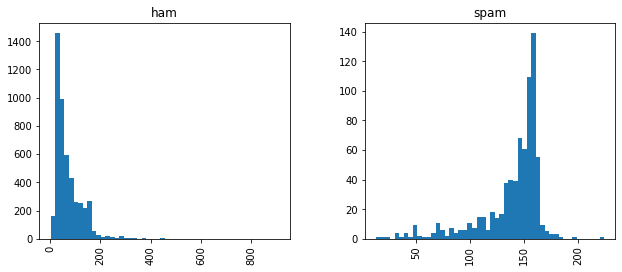

In [10]:
df.hist(column='length', by='label', bins=50,figsize=(10,4))

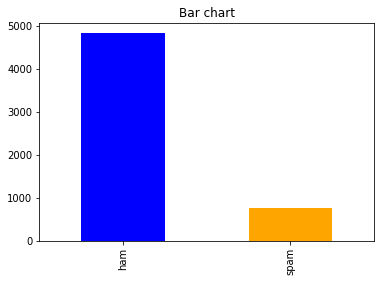

In [11]:
count_Class=pd.value_counts(df["label"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

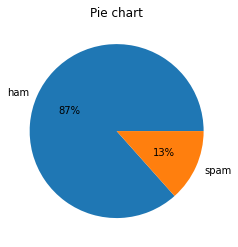

In [12]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [13]:
count1 = Counter(" ".join(df[df['label']=='ham']["sms"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(df[df['label']=='spam']["sms"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

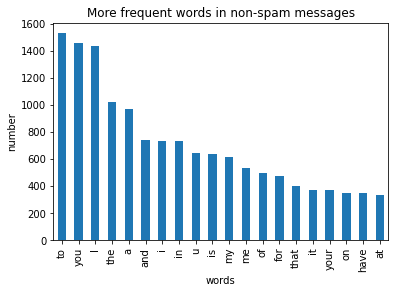

In [14]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

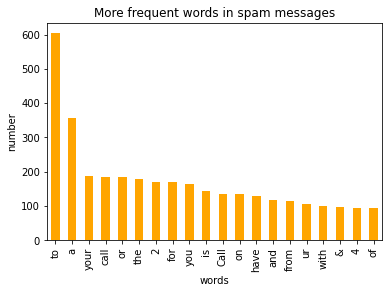

In [15]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [16]:
df

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [17]:
df.loc[:,'label'] = df.label.map({'ham':0, 'spam':1})
print(df.shape)
df.head()

(5572, 3)


,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


# Bag of Words Approach

What we have here in our data set is a large collection of text data (5,572 rows of data). Most ML algorithms rely on numerical data to be fed into them as input, and email/sms messages are usually text heavy. We need a way to represent text data for machine learning algorithm and the bag-of-words model helps us to achieve that task. It is a way of extracting features from the text for use in machine learning algorithms. In this approach, we use the tokenized words for each observation and find out the frequency of each token. Using a process which we will go through now, we can convert a collection of documents to a matrix, with each document being a row and each word(token) being the column, and the corresponding (row,column) values being the frequency of occurrence of each word or token in that document.

For example:

Lets say we have 4 documents as follows:

['Hello, how are you!', 'Win money, win from home.', 'Call me now', 'Hello, Call you tomorrow?']

Our objective here is to convert this set of text to a frequency distribution matrix, as follows:

![](https://image.ibb.co/casG7U/countvectorizer.png)

Here as we can see, the documents are numbered in the rows, and each word is a column name, with the corresponding value being the frequency of that word in the document.

Lets break this down and see how we can do this conversion using a small set of documents.

To handle this, we will be using sklearns count vectorizer method which does the following:

It tokenizes the string(separates the string into individual words) and gives an integer ID to each token.
It counts the occurrence of each of those tokens.

# Implementation of Bag of Words Approach



**Step 1: Convert all strings to their lower case form.**

In [18]:
documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

lower_case_documents = []
lower_case_documents = [d.lower() for d in documents]
print(lower_case_documents)

['hello, how are you!', 'win money, win from home.', 'call me now.', 'hello, call hello you tomorrow?']


**Step 2: Removing all punctuations**

In [19]:
sans_punctuation_documents = []
import string

for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans("","", string.punctuation)))
    
sans_punctuation_documents

['hello how are you',
 'win money win from home',
 'call me now',
 'hello call hello you tomorrow']

**Step 3: Tokenization**

In [20]:
preprocessed_documents = [[w for w in d.split()] for d in sans_punctuation_documents]
preprocessed_documents

[['hello', 'how', 'are', 'you'],
 ['win', 'money', 'win', 'from', 'home'],
 ['call', 'me', 'now'],
 ['hello', 'call', 'hello', 'you', 'tomorrow']]

**Step 4: Count frequencies**

In [21]:
frequency_list = []
import pprint
from collections import Counter

frequency_list = [Counter(d) for d in preprocessed_documents]
pprint.pprint(frequency_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

# Data preprocessing with CountVectorizer()

In above step, we implemented a version of the CountVectorizer() method from scratch that entailed cleaning our data first. This cleaning involved converting all of our data to lower case and removing all punctuation marks. CountVectorizer() has certain parameters which take care of these steps for us. They are:

lowercase = True

The lowercase parameter has a default value of True which converts all of our text to its lower case form.

token_pattern = (?u)\b\w\w+\b

The token_pattern parameter has a default regular expression value of (?u)\b\w\w+\b which ignores all punctuation marks and treats them as delimiters, while accepting alphanumeric strings of length greater than or equal to 2, as individual tokens or words.

stop_words

The stop_words parameter, if set to english will remove all words from our document set that match a list of English stop words which is defined in scikit-learn. Considering the size of our dataset and the fact that we are dealing with SMS messages and not larger text sources like e-mail, we will not be setting this parameter value.

In [23]:
count_vector.fit(documents)
count_vector.get_feature_names()

['are',
 'call',
 'from',
 'hello',
 'home',
 'how',
 'me',
 'money',
 'now',
 'tomorrow',
 'win',
 'you']

In [24]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]])

In [25]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


# Model Building

![](https://lh4.googleusercontent.com/WFmLk4zeHeLnAUHL9p4ePChAziudL8SX3yTHgmNhUNJXzGcHvnIEZc1SupmYN61imvLDK72Qa4vAhSlohtZeRT0EPCOBG9RaQCYI7MVhULVRuIJcWhMqGPYHEugLnhR72oMPkl4S)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['sms'], 
                                                    df['label'],test_size=0.20, 
                                                    random_state=1)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. 
testing_data = count_vector.transform(X_test)

In [29]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

MultinomialNB()

# Evaluation

In [30]:
predictions = naive_bayes.predict(testing_data)

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.9847533632286996
Precision score: 0.9420289855072463
Recall score: 0.935251798561151
F1 score: 0.9386281588447652


![](https://miro.medium.com/max/828/1*CS-OYdiRLCBMBiOpEURy0g.png)

# Credit 
> https://www.kaggle.com/code/ryanluoli2/a-complete-guide-to-naive-bayes-classifiers
> https://www.kaggle.com/code/sid321axn/sms-spam-classifier-naive-bayes-ml-algo/notebook
> https://binitaregmi.medium.com/spam-classification-using-naive-bayes-algorithm-3e263061a3b0
> https://binitaregmi.medium.com/spam-classification-using-naive-bayes-algorithm-3e263061a3b0
> https://medium.com/@serbanliviu/building-a-simple-yet-powerful-spam-filter-with-naive-bayes-classifier-1e6a98feaea6
> 

**Without this source this notebook can't possabile. Specail thanks behind this people who are made this resource.**